<a href="https://colab.research.google.com/github/KarolKucinski2001/Machine-Learning/blob/main/Lab5_algorytm_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wstępna obróbka danych


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
# Wczytanie danych
data_csv = pd.read_csv('stroke.csv', sep=';')
data_csv.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Przygotowanie danych do pracy

In [ ]:
# Usunięcie wierszy z brakującymi danymi w kolumnie bmi
data_csv = data_csv.dropna(subset=['bmi'])
# Zamiana Yes na 1 oraz No na 0 w kolumnie ever_married
data_csv['ever_married'] = data_csv['ever_married'].map({'Yes': 1, 'No': 0})
# Zastosowanie dummy encoding dla zmiennych kategorycznych
categorical_columns = ['gender', 'work_type', 'Residence_type', 'smoking_status']
data_csv = pd.get_dummies(data_csv, columns=categorical_columns)
data_csv.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,1,228.69,36.6,1,0,1,0,0,1,0,0,0,1,0,1,0,0
2,80.0,0,1,1,105.92,32.5,1,0,1,0,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,1,171.23,34.4,1,1,0,0,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,1,174.12,24.0,1,1,0,0,0,0,1,0,1,0,0,0,1,0
5,81.0,0,0,1,186.21,29.0,1,0,1,0,0,1,0,0,0,1,0,1,0,0


In [ ]:
print(data_csv['stroke'].value_counts())

0    4699
1     209
Name: stroke, dtype: int64


Jak widzimy w naszych danych mamy jedynie 209 przypadków osób chorych, natomiast aż 4699 przypadków osób zdrowych. Może to spowodować błędne oszacowanie modelu, gdyż model nauczy się, że prawie zawsze pacjent jest chory. Aby uniknąć takiego przypadku można zastosować kilka metod, podstawowe z nich to undersampling i oversampling, można też zastosować bardziej zaawansowane metody jak na przykład SMOTE (Synthetic Minority Over-sampling Technique). W naszym przypadku użyjemy właśnie tej ostatniej techniki ponieważ w przypadku klasyfikacji groźnej choroby istone jest aby unikać utraty informacji, która może być kluczowa dla wykrywania rzadkich, ale ważnych przypadków. SMOTE generuje syntetyczne próbki klasy o mniejszej liczności, zachowując jednocześnie cechy i charakterystyki klasy większościowej. Oznacza to, że nie tracimy oryginalnych danych i nie ma ryzyka utraty ważnych informacji.

In [ ]:
X_tmp = data_csv.drop(['stroke'], axis=1)
y_tmp = data_csv['stroke']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tmp, y_tmp)
data_balanced = pd.concat([X_resampled, y_resampled], axis=1)
print(data_balanced['stroke'].value_counts() )
X_resampled.head()

1    4699
0    4699
Name: stroke, dtype: int64


,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,gender_Female,gender_Male,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,1,228.69,36.6,0,1,0,0,1,0,0,0,1,0,1,0,0
1,80.0,0,1,1,105.92,32.5,0,1,0,0,1,0,0,1,0,0,0,1,0
2,49.0,0,0,1,171.23,34.4,1,0,0,0,1,0,0,0,1,0,0,0,1
3,79.0,1,0,1,174.12,24.0,1,0,0,0,0,1,0,1,0,0,0,1,0
4,81.0,0,0,1,186.21,29.0,0,1,0,0,1,0,0,0,1,0,1,0,0


Podział na zbiór treningowy i testowy

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1)



Standaryzacja i normalizacja danych

In [ ]:
standardScaler = StandardScaler()
X_train_standarized = standardScaler.fit_transform(X_train)
X_test_standarized = standardScaler.transform(X_test)

minMaxScaler = MinMaxScaler(feature_range=(0,1))
X_train_normalized = minMaxScaler.fit_transform(X_train)
X_test_normalized = minMaxScaler.fit_transform(X_test)

In [ ]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5108
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4908 non-null   float64
 1   hypertension                    4908 non-null   int64  
 2   heart_disease                   4908 non-null   int64  
 3   ever_married                    4908 non-null   int64  
 4   avg_glucose_level               4908 non-null   float64
 5   bmi                             4908 non-null   float64
 6   stroke                          4908 non-null   int64  
 7   gender_Female                   4908 non-null   uint8  
 8   gender_Male                     4908 non-null   uint8  
 9   work_type_Govt_job              4908 non-null   uint8  
 10  work_type_Never_worked          4908 non-null   uint8  
 11  work_type_Private               4908 non-null   uint8  
 12  work_type_Self-employed         49

# Zadanie 1

## Jądro liniowe

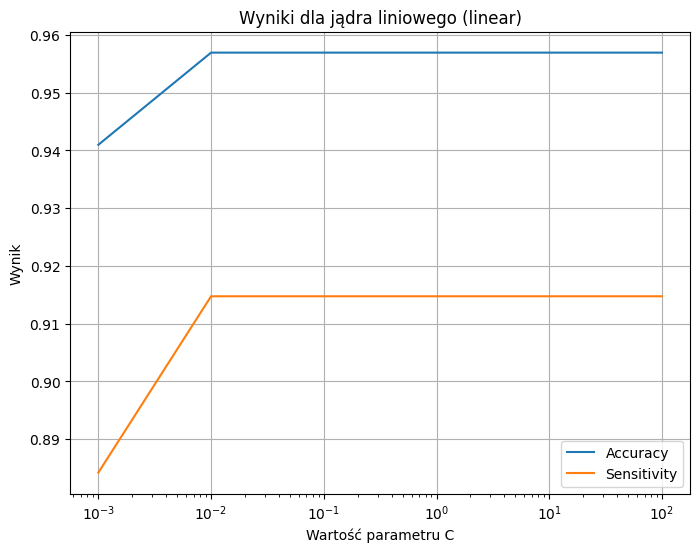

In [ ]:
# Inicjalizacja modelu SVM z jądrem liniowym
svm_linear = SVC(kernel='linear')

# Hiperparametry do optymalizacji przy użyciu GridSearchCV
param_grid_linear = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Przygotowanie list na wyniki
accuracy_list_linear = []
sensitivity_list_linear = []

# Iteracja po różnych wartościach parametru C
for c in param_grid_linear['C']:
    svm_linear = SVC(kernel='linear', C=c)
    svm_linear.fit(X_train_standarized, y_train)
    y_pred_linear = svm_linear.predict(X_test_standarized)

    # Obliczanie dokładności (accuracy)
    accuracy_linear = accuracy_score(y_test, y_pred_linear)
    accuracy_list_linear.append(accuracy_linear)

    # Obliczanie czułości (sensitivity)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_linear).ravel()
    sensitivity_linear = tp / (tp + fn)
    sensitivity_list_linear.append(sensitivity_linear)

# Tworzenie wykresu
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(param_grid_linear['C'], accuracy_list_linear, label='Accuracy')
plt.plot(param_grid_linear['C'], sensitivity_list_linear, label='Sensitivity')
plt.xscale('log')
plt.xlabel('Wartość parametru C')
plt.ylabel('Wynik')
plt.title('Wyniki dla jądra liniowego (linear)')
plt.legend()
plt.grid(True)
plt.show()


## Jądro wielomianowe

In [ ]:
# Inicjalizacja modelu SVM z jądrem wielomianowym
svm_poly = SVC(kernel='poly')

# Hiperparametry do optymalizacji przy użyciu GridSearchCV
param_grid_poly = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'degree': [2, 3, 4], 'gamma': [0.001, 0.01, 0.1, 1]}

# Przygotowanie list na wyniki
accuracy_list_poly = []
sensitivity_list_poly = []

# Iteracja po różnych kombinacjach parametrów
for c in param_grid_poly['C']:
    for degree in param_grid_poly['degree']:
        for gamma in param_grid_poly['gamma']:
            svm_poly = SVC(kernel='poly', C=c, degree=degree, gamma=gamma)
            svm_poly.fit(X_train_standarized, y_train)
            y_pred_poly = svm_poly.predict(X_test_standarized)

            # Obliczanie dokładności (accuracy)
            accuracy_poly = accuracy_score(y_test, y_pred_poly)
            accuracy_list_poly.append(accuracy_poly)

            # Obliczanie czułości (sensitivity)
            tn, fp, fn, tp = confusion_matrix(y_test, y_pred_poly).ravel()
            sensitivity_poly = tp / (tp + fn)
            sensitivity_list_poly.append(sensitivity_poly)

# Tworzenie wykresu
import numpy as np

accuracy_array_poly = np.array(accuracy_list_poly).reshape(len(param_grid_poly['C']), len(param_grid_poly['degree']), len(param_grid_poly['gamma']))
sensitivity_array_poly = np.array(sensitivity_list_poly).reshape(len(param_grid_poly['C']), len(param_grid_poly['degree']), len(param_grid_poly['gamma']))

fig, axes = plt.subplots(len(param_grid_poly['degree']), len(param_grid_poly['gamma']), figsize=(14, 10), sharex='all', sharey='all')

for i in range(len(param_grid_poly['degree'])):
    for j in range(len(param_grid_poly['gamma'])):
        axes[i, j].plot(param_grid_poly['C'], accuracy_array_poly[:, i, j], label='Accuracy')
        axes[i, j].plot(param_grid_poly['C'], sensitivity_array_poly[:, i, j], label='Sensitivity')
        axes[i, j].set_xscale('log')
        axes[i, j].set_xlabel('Wartość parametru C')
        axes[i, j].set_ylabel('Wynik')
        axes[i, j].set_title(f'degree={param_grid_poly["degree"][i]}, gamma={param_grid_poly["gamma"][j]}')
        axes[i, j].legend()
        axes[i, j].grid(True)

plt.tight_layout()
plt.show()


KeyboardInterrupt: ignored

## Jądro radialne

In [ ]:
# Inicjalizacja modelu SVM z jądrem radialnym (RBF)
svm_rbf = SVC(kernel='rbf')

# Hiperparametry do optymalizacji przy użyciu GridSearchCV
param_grid_rbf = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

# Przygotowanie list na wyniki
accuracy_list_rbf = []
sensitivity_list_rbf = []

# Iteracja po różnych kombinacjach parametrów
for c in param_grid_rbf['C']:
    for gamma in param_grid_rbf['gamma']:
        svm_rbf = SVC(kernel='rbf', C=c, gamma=gamma)
        svm_rbf.fit(X_train_standarized, y_train)
        y_pred_rbf = svm_rbf.predict(X_test_standarized)

        # Obliczanie dokładności (accuracy)
        accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
        accuracy_list_rbf.append(accuracy_rbf)

        # Obliczanie czułości (sensitivity)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rbf).ravel()
        sensitivity_rbf = tp / (tp + fn)
        sensitivity_list_rbf.append(sensitivity_rbf)

# Tworzenie wykresu
accuracy_array_rbf = np.array(accuracy_list_rbf).reshape(len(param_grid_rbf['C']), len(param_grid_rbf['gamma']))
sensitivity_array_rbf = np.array(sensitivity_list_rbf).reshape(len(param_grid_rbf['C']), len(param_grid_rbf['gamma']))

plt.figure(figsize=(10, 6))
for i in range(len(param_grid_rbf['C'])):
    plt.plot(param_grid_rbf['gamma'], accuracy_array_rbf[i], label=f'C={param_grid_rbf["C"][i]}: Accuracy')
    plt.plot(param_grid_rbf['gamma'], sensitivity_array_rbf[i], label=f'C={param_grid_rbf["C"][i]}: Sensitivity')

plt.xlabel('Wartość parametru gamma')
plt.ylabel('Wynik')
plt.title('Wyniki dla jądra radialnego (RBF)')
plt.legend()
plt.grid(True)
plt.show()


# Zadanie 2

In [ ]:
# Regresja Logistyczna
log_reg = LogisticRegression()
log_reg.fit(X_train_standarized, y_train)
y_pred_log_reg = log_reg.predict(X_test_standarized)

# Obliczenia metryk dla regresji logistycznej
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

print("Accuracy for Logistic Regression:", accuracy_log_reg)
print("Confusion Matrix for Logistic Regression:\n", conf_matrix_log_reg)

Accuracy for Logistic Regression: 0.9574468085106383
Confusion Matrix for Logistic Regression:
 [[920  10]
 [ 70 880]]
